# CS541: Applied Machine Learning, Fall 2023, Problem Set 2

Problem set 2 is due in Gradescope on Oct 10 at 11:59pm.
All the questions are in this jupyter notebook file. There are three questions in this assignment, each of which could have multiple parts and consists of a mix of coding and short answer questions. This assignment is worth a total of **145 points**.  Note that each individual pset contributes the same amount to the final grade regardless of the number of points it is worth.

After completing these questions you will need to covert this notebook into a .py file named **ps2.py** and a pdf file named **ps2.pdf** in order to submit it (details below).

**Submission instructions:** please upload your completed solution files to Gradescope by the due date. **Make sure you have run all code cells and rendered all markdown/Latex without any errors before submitting.**

**Note**: For coding part, **remember to return the required variable**. Simply use `print()` at the end will return `None`, which will result in failing the test case.

There will be 2 separate submission links for the assignment, one to submit **ps2.py** file for autograder on the coding part, and the other one for **ps2.PDF** for manually grading on writing part. You can use Jupyter Notebook to convert the formats:
  + Convert to PDF file: Go to File->Download as->PDF
  + Convert py file: Go to File->Download as->py (HTML) (quick reference guide [here](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/convert_py.gif) )

**Submission Links**
  + PDF (ps2.pdf) submission (50 pts): https://www.gradescope.com/courses/599369/assignments/3224812/submissions 
  + Python file (ps2.py) submission (90 pts): https://www.gradescope.com/courses/599369/assignments/3224822/submissions 

**Assignment Setup**

You can use [Google Colab](https://colab.research.google.com/) for this assignment. It has been tested on Colab, so you should be able to run it on colab without any errors.

If you would prefer to setup your code locally on your own machine, you will need [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook) or [JupyterLab](https://jupyter.org/install#jupyterlab) installation. One way to set it up is to install “Anaconda” distribution, which has Python, several libraries including the Jupyter Notebook that we will use in class. It is available for Windows, Linux, and Mac OS X [here](https://docs.conda.io/en/latest/miniconda.html). 

  If you are not familiar with Jupyter Notebook, you can follow [this blog](https://realpython.com/jupyter-notebook-introduction/) for an introduction.
 


In [297]:
## import some libraries
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
from typing import Tuple

import mpl_toolkits.mplot3d

# **Question 1.** PCA  (*45 total points*)

In this section, we will use principal component analysis (PCA) to perform dimensionality reduction. We will impelement and use PCA on Iris dataset. Then, we compare our results with Sklearn's implementation and take a look at Plotly for visualization.

In [298]:
## Read Iris dataset
iris = datasets.load_iris()
X = iris.data  
y = iris.target

## **1.1 Code:** Feature normalization *(10 pts)*
It's a good practice to normalize the dataset before using PCA. 

Write a function to map the data to $\mu = 0, \sigma = 1$ by performing $x = \frac{x - \mu}{\sigma}$ for each dimension.\
 You have to use numpy for this question.

In [299]:
def question_1_1(X: np.ndarray) -> np.ndarray:
    """
        X: numpy array, shape (num samples, feature dim)
        return: a normalized numpy array with the same size
    """
    
    # Write your code in this block -----------------------------------------------------------
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    
    result = (X - means) / stds
    return result

    # End of your code ------------------------------------------------------------------------
    
## Test your function
X_norm = question_1_1(X)
X_norm[:10]  

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## **1.2 Code:** SVD *(10 pts)*

Singular Value Decomposition (SVD) is a factorization of a real or complex matrix.

Let $M \in \mathbb{R}^{m \times n}$ be a matrix rank $r$, the SVD of $A$ is a decomposition of the form
  $$ M = U \Sigma V^T $$
where $U \in \mathbb{R}^{m \times m}$ is an orthogonal matrix ($U^T U = I$), $V \in \mathbb{R}^{n \times n}$ is an orthogonal matrix, and $\Sigma \in \mathbb{R}^{m \times n}$ is a diagonal matrix with $r$ positive scalars $\sigma_1, \dots, \sigma_r$ on the diagonal (in the $r \times r$ block on the upper left) and zeros everywhere else. The scalars $\sigma_1, \dots, \sigma_r$ are called the singular values and are given by
  $$\sigma_i = \sqrt{\text{$i$-th eigenvalue of $M^\top M$}},$$
and by convention they appear in non-increasing order:
  $$\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r.$$
The columns of $U$ and $V$ respectively are called the left and right singular vectors of $M$, and can be obtained by taking an orthonormal set of eigenvectors for the matrices $M M^T$ and $M^T M$.

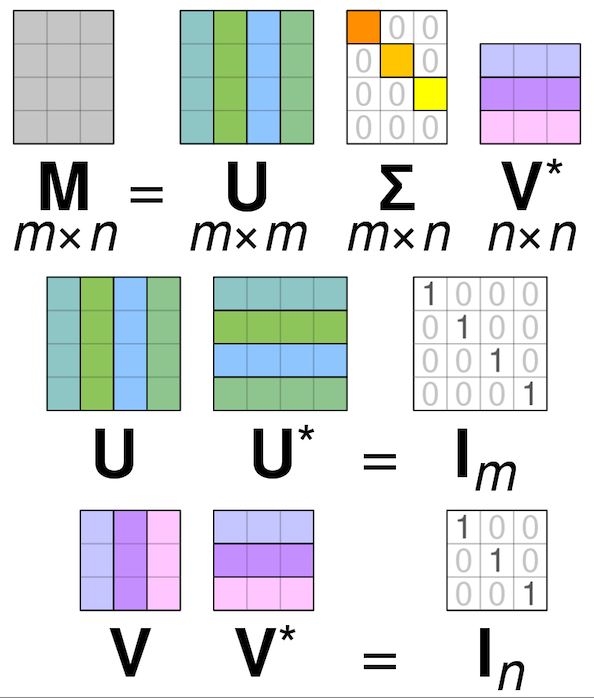

In [300]:
## Here's a quick recap on SVD (Figure from wiki)
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps2/svd.png")

We will use `np.linalg.svd` to implement PCA.
You will need to complete the function below.

In [301]:
def question_1_2(X_norm: np.ndarray, n_components: int) -> np.ndarray:
    """
    Computes the reduced data representation when projecting onto the top "k" eigenvectors
    X_norm: numpy array, shape of (num samples, feature dim)
    n_components: the number of components to project the data 
    return: numpy array, shape (num samples, `n_components`)
    """
 
    # Write your code in this block -----------------------------------------------------------
    
    cov_matrix = (1/len(X_norm)) * np.dot(X_norm.T, X_norm)
    
    U, S, V = np.linalg.svd(cov_matrix)
    
    U_reduced = U[:, :n_components]
    X_reduced = np.dot(X_norm, U_reduced)
    
    ## return the reduced data
    return X_reduced
    

    # End of your code ------------------------------------------------------------------------

## Test your function
X_reduced = question_1_2(X_norm, n_components = 3)

## show result as a data frame
df_ans = pd.DataFrame(X_reduced, columns=['PCA{i}'.format(i=i) for i in range(1, X_reduced.shape[1] + 1)])
df_ans.head(5)



# 	PCA1	PCA2	PCA3
# 0	-2.264703	-0.480027	0.127706
# 1	-2.080961	0.674134	0.234609
# 2	-2.364229	0.341908	-0.044201
# 3	-2.299384	0.597395	-0.091290
# 4	-2.389842	-0.646835	-0.015738


,PCA1,PCA2,PCA3
0,2.264703,-0.480027,0.127706
1,2.080961,0.674134,0.234609
2,2.364229,0.341908,-0.044201
3,2.299384,0.597395,-0.091290
4,2.389842,-0.646835,-0.015738


## **1.3 Code:** PCA using Sklearn *(20 pts)*
Complete the function below to perform the PCA using Sklearn. You should refer to the document [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to complete this question.

To pick top $k$ components out of $r$, we sort all the eigenvalues in descending order, and the top $k$ corresponding eigenvectors.\
We measure the accumulation of variance explained in top $k$ components:
$\text { cumulative variance explained }=\frac{\sum_{j=1}^k \lambda_j}{\sum_{i=1}^r \lambda_i}$, where $\lambda_i$ is eigenvalues

In [302]:
from sklearn.decomposition import PCA

def question_1_3(X: np.ndarray, n_components: int) ->  Tuple[np.ndarray, np.ndarray]:
    """
        perform PCA using Sklearn. 
        You can use PCA from `sklearn.decomposition`
        X: numpy array, shape (num samples, feature dim)
        n_components: number of components
        return: a tuple (`X_reduced`, `var_explained`), where 
          + `X_reduced` is the reduced data of `X`, numpy array shape (num samples, `n_components`)
          + `cum_var_explained` is the percentage of variance explained if we choose the top 1, 2, ..., `n_components` components,
           numpy array shape (`n_components`,)
           
    """
    
    # Write your code in this block ----------------------------------------------------------- 
    # for `cum_var_explained`, look at `explained_variance_ratio_` attribute of Sklearn's PCA
    pca = PCA(n_components=n_components)
    
    X_reduced = pca.fit_transform(X)
    
    cum_var_explained = pca.explained_variance_ratio_
    
    # End of your code ------------------------------------------------------------------------
    return (X_reduced, cum_var_explained)
 
    
## Test your function
X_reduced, cum_var_explained = question_1_3(X_norm, n_components=3)

## check out cum_var_explained:
for i in range(len(cum_var_explained)):
  print(f"top {i+1} component(s) explained {cum_var_explained[i]} of variance")

## Show the result as a data frame
df = pd.DataFrame(X_reduced, columns=['PC{i}'.format(i=i) for i in range(1, X_reduced.shape[1] + 1)])
df['species'] = y
df.head(5)


# top 1 component(s) explained 0.7296244541329987 of variance
# top 2 component(s) explained 0.9581320720000165 of variance
# top 3 component(s) explained 0.9948212908928452 of variance

top 1 component(s) explained 0.7296244541329989 of variance
top 2 component(s) explained 0.22850761786701754 of variance
top 3 component(s) explained 0.03668921889282872 of variance


,PC1,PC2,PC3,species
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0


The PCA result should be the same to our implemetation in question 1.2, except the sign of the columns.

## **1.4 Short Answer:** Look the variance explained in just the top 1 and then in the top 3 (this includes top eigenvectors 1,2,3). What do you infer from it? Do you think using just the top 1 will capture the data better or all top 3? (5pts)

**Your answer**

**Solution:** Variance of top 1 is lower than that of top 3. This means using top 1 will capture the data better than all top 3 because the lower variance in comparison indicates that the transformed data are closer to the mean and do not fluctuate excessively. 

**Visualize PCA**: When it comes to interactive visualization, [plotly](https://plotly.com/python/) is a good package we can use. It can be installed using pip `pip install plotly==5.10.0`
or conda `conda install -c plotly plotly=5.10.0`


In [303]:
## 2D plot
import plotly.express as px
fig = px.scatter(df, x='PC1', y='PC2',
              color='species')
fig.show()
## you can try to interact with the chart such as mousing over the point, zooming in (by cropping)

In [304]:
## 3D plot
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
              color='species', )
fig.update_traces(marker_size = 4)
fig.show()
## you can try to interact with the plot such as zoom in/out, rotate the chart

# **Question 2.** K-means (*60 total points*)

For this section, we will first implement K-means using numpy. Then, we will see how to use K-means with Sklearn.

In [305]:
## we set up the dataset and some plot functions to visualize the clusters.

import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.misc


def plot_cluster(samples, centroids, clusters=None):
    """
    Plot samples and color it according to cluster centroid.
    :param samples: samples that need to be plotted.
    :param centroids: cluster centroids.
    :param clusters: list of clusters corresponding to each sample.
    If clusters is None, all points are plotted with the same color.
    """

    colors = ['blue', 'green', 'gold']
    assert centroids is not None

    if clusters is not None:
        sub_samples = []
        for cluster_id in range(centroids[0].shape[0]):
            sub_samples.append(np.array([samples[i] for i in range(samples.shape[0]) if clusters[i] == cluster_id]))
    else:
        sub_samples = [samples]

    plt.figure(figsize=(8, 6))

    for cluster_id, clustered_samples in enumerate(sub_samples):
        plt.plot(clustered_samples[:, 0], clustered_samples[:, 1], 'o', color=colors[cluster_id], alpha=0.75,
                 label='Data Points: Cluster %d' % cluster_id)

    # Drawing a history of centroid movement, first centroid is black
    tempx, tempy = [], []
    for mycentroid in centroids:
        tempx.append(mycentroid[:, 0])
        tempy.append(mycentroid[:, 1])
                    
    plt.plot(tempx, tempy, 'rx--', markersize=8)
    plt.plot(tempx[0], tempy[0], 'kx', markersize=8)
    
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    if len(centroids) > 1:
        plt.title(f'Plot of samples, #iterations = {len(centroids)}', fontsize=16)
    else:
        plt.title(f'Plot of samples', fontsize=16)
    plt.grid(True)
    
    plt.legend(loc=4, framealpha=0.5)
    plt.show(block=True)


In [306]:
## Read 300 2-d samples
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps2/kmean_data.csv")
samples = df.values  ## convert data frame to numpy
print(type(samples), samples.shape)

<class 'numpy.ndarray'> (300, 2)


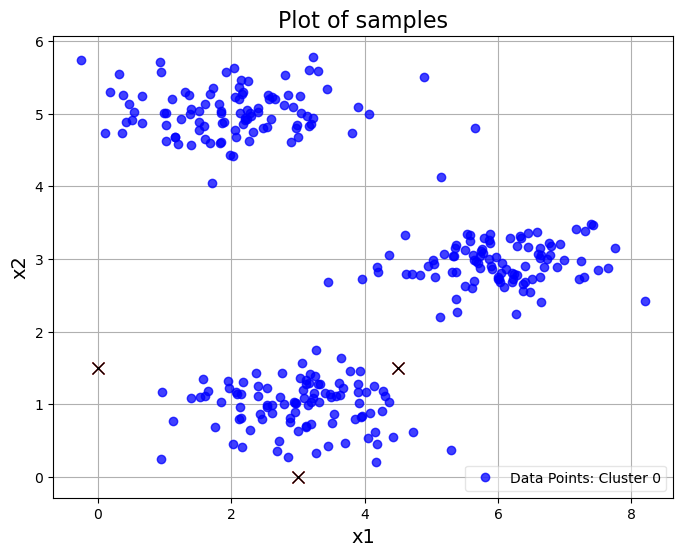

In [307]:
# Choose some random initial centroids, then plot the dataset with the centroids (denoted by "x")
initial_centroids = np.array([[3, 0], [4.5, 1.5], [0, 1.5]])
plot_cluster(samples, [initial_centroids])

## **2.1 Code:** K-means - Find closest centroid *(10 pts)*

In the cluster assignment phase of the $K$-means algorithm, the
algorithm assigns every training example $x_i$ to its closest centroid,
given the current positions of centroids. Specifically, for every
example $x_i$ we set

$$c_i := \arg\min_j ||x_i - \mu_j||^2$$

where $c_i$ is the index of the centroid that is closest to $x_i$, and $j$
is the position (index) of the $j$-th centroid.

You will need to complete the function below to find the closest centroid for all samples.

In [308]:
def question_2_1(samples: np.ndarray, centroids: np.ndarray) -> np.array:
    """
    Find the closest centroid for all samples.

    samples: numpy array, shape of (num samples `x`, num dimensions `d` = 2), input samples.
    centroids: numpy array, shape of (num clusters `k` = 3, num dimensions `d` = 2), array of `k` cluster centroids.
    return: a  numpy array shape (num samples `x`, ) that contains cluster assignments (indices) for each sample.
    """
    # Write your code in this block -----------------------------------------------------------
    
    clusters = np.zeros(len(samples))
    
    sample_indices = np.arange(len(samples))
    
    distance_to_0 = np.sqrt((np.array(samples[:,0]) - centroids[0][0]) ** 2 + (np.array(samples[:,1]) - centroids[0][1]) ** 2)
    
    distance_to_1 = np.sqrt((np.array(samples[:,0]) - centroids[1][0]) ** 2 + (np.array(samples[:,1]) - centroids[1][1]) ** 2)
    
    distance_to_2 = np.sqrt((np.array(samples[:,0]) - centroids[2][0]) ** 2 + (np.array(samples[:,1]) - centroids[2][1]) ** 2)
    
    distances = [distance_to_0, distance_to_1, distance_to_2]
    
    distances = np.array(distances).T
    
    return distances.argmin(axis=1)

    # End of your code ------------------------------------------------------------------------
    
#     array([2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
#        2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
#        2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#        1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
#        2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1,
#        0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
#        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
#        2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
#        0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
#        2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])
    

In [309]:
## test your function
clusters = question_2_1(samples, initial_centroids)
clusters

array([2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

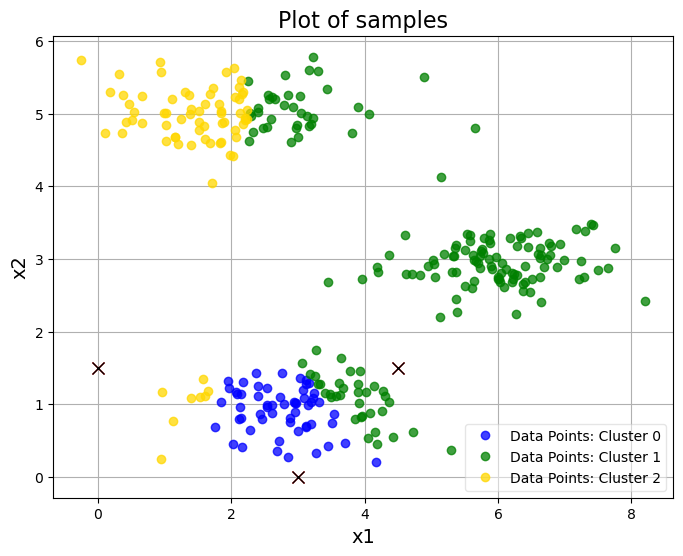

In [310]:
## plot your results (see the colors for the clusters)
plot_cluster(samples, [initial_centroids], clusters)

## **2.2 Code:** K-means - Update Centroids  *(20 pts)*

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it. Specifically, for every centroid $k$ we set

$$\mu_k := \frac{1}{|C_k|}\sum_{x_i\in C_k} x_i$$

where $C_k$ is the set of examples that are assigned to centroid $k$.
Concretely, if only three samples say $\{1, 2\}$, $\{3,4\}$ and $\{5,6\}$ are assigned to centroid
$k= 2$, then you should update

$$\mu_2=\frac{1}{3} \{ (1+3+5), (2+4+6)\} = \{ 3, 4 \}$$


In [311]:
def question_2_2(samples: np.ndarray, clusters: np.ndarray) -> np.ndarray:
    """
    Find the new centroid (mean) given the samples and their current cluster.

    samples: numpy array, shape (num samples `x`, num dimensions `d` = 2)
    clusters: numpy array, shape (num samples `x`, ), contains cluster indices (results from previous question)
    return an numpy array of new centroids, shape (num clusters `k` = 3, num dimensions `d` = 2)
    """
    ## Hint: You can initialize `k` "sum" variables, and `k` "count" variables.
    # A "sum" variable is to compute cumulative sum of all data samples in a cluster,
    # while "count" is to count how many of them in there.
    # You can go over each sample at a time, update its corresponding "sum" and "count".
    # After that, you should be able to get the new centroids.
    
    
    # Write your code in this block -----------------------------------------------------------
    
    k_sum = np.zeros([3,2])
    k_count = np.zeros([3])
    
    for i in range(len(samples)):
            k_count[clusters[i]] += 1
            k_sum[clusters[i],0] += samples[i, 0]
            k_sum[clusters[i],1] += samples[i, 1]
            
            
    index = np.arange(3)
    new_centroid = np.zeros([3,2])
    
    new_centroid = k_sum / k_count[:, None]
    
    return  new_centroid
    # End of your code ------------------------------------------------------------------------
  
    
    
## test your function
question_2_2(samples, clusters) 

# array([[2.75025225, 0.91645498],
#        [4.92723905, 3.02696871],
#        [1.42342507, 4.55286883]])

array([[2.75025225, 0.91645498],
       [4.92723905, 3.02696871],
       [1.42342507, 4.55286883]])

In [312]:
## Let's see how our implementation works

def run_k_means(samples, initial_centroids, max_n_iter, verbose=False):
    """
    Run K-means algorithm. The number of clusters 'K' is defined by the size of initial_centroids
    :param samples: samples.
    :param initial_centroids: a list of initial centroids.
    :param max_n_iter: maximum number of iterations to run. We will stop when the centroids don't get updated.
    :return: a pair of cluster assignment and history of centroids.
    """

    centroid_history = []
    current_centroids = initial_centroids
    clusters = []
    for iteration in range(max_n_iter):
        centroid_history.append(current_centroids)
       
        clusters = question_2_1(samples, current_centroids)
        current_centroids = question_2_2(samples, clusters)
        
        if np.array_equal(current_centroids, centroid_history[-1]): ## no change
            break
        
        if verbose:
            print("Iteration %d, Finding centroids for all samples..." % iteration)
            print("Recompute centroids...")
    return clusters, centroid_history

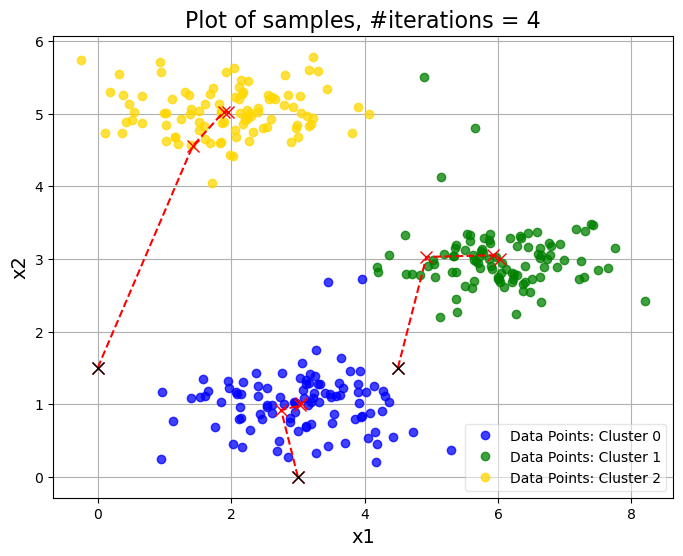

In [313]:
clusters, centroid_history  = run_k_means(samples, initial_centroids, max_n_iter=10)
plot_cluster(samples, centroid_history, clusters)

## **2.3 Short answer:** K-means - Centroid initialization  *(10 pts)*

K-means is quite sensitive to the initialization of k centroids. In practice, K-means algorithm will be run several times, each with a different centroid seed, which is what [Sklearn's KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) does under the hood. We then pick the best one based on some criterion. In this question, we will re-run K-means to conduct an experiment on centroid initialization. You will need to answer the question at the end of this section.

In [314]:
def choose_random_centroids(samples, k):
    """
    Randomly choose k centroids from samples.
    :return: an array of centroids.
    """
    rand_indices = random.sample(range(0, samples.shape[0]), k)
    return np.array([samples[i] for i in rand_indices])                     

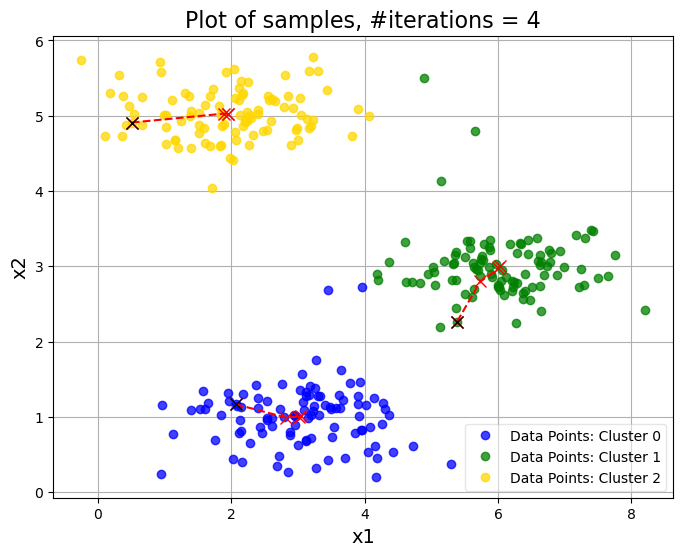

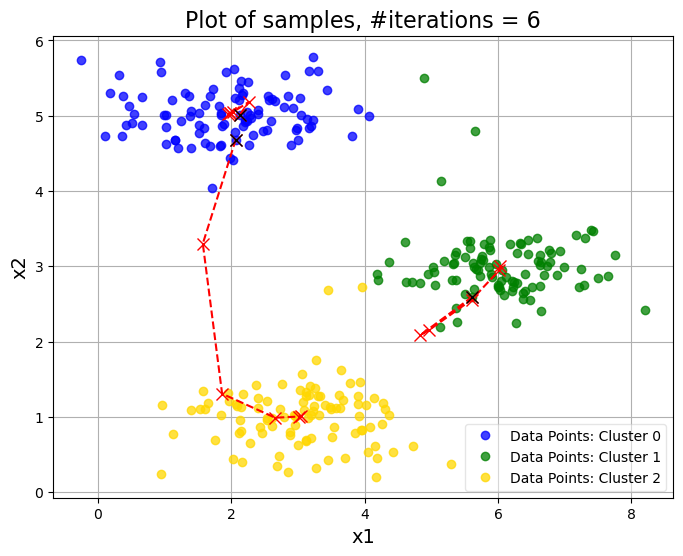

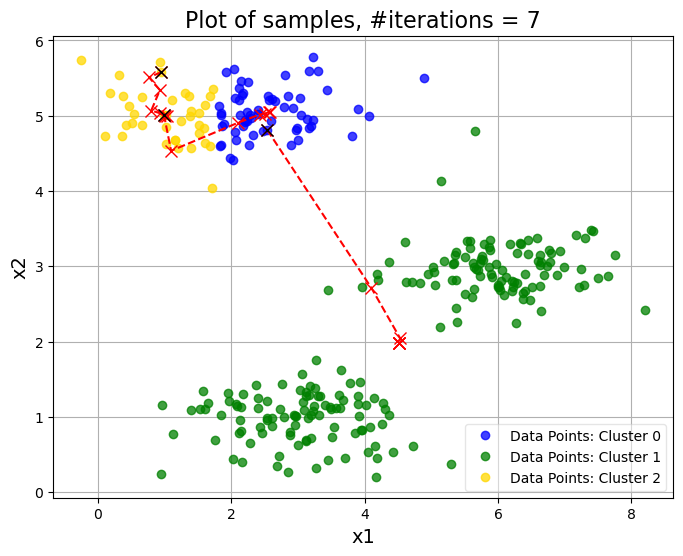

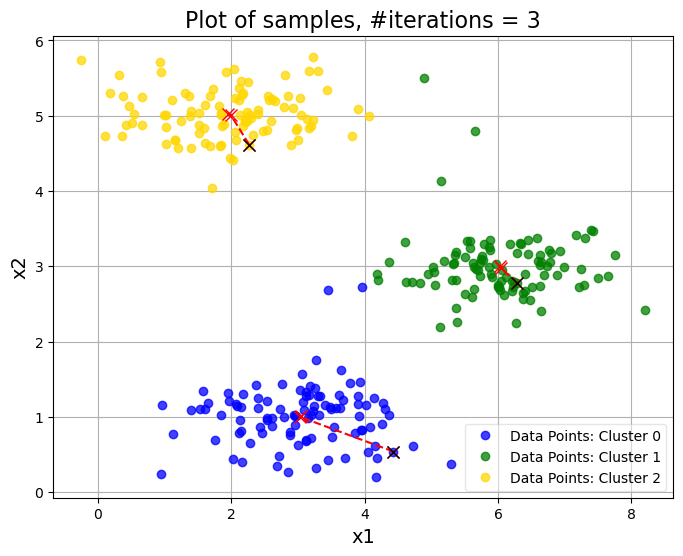

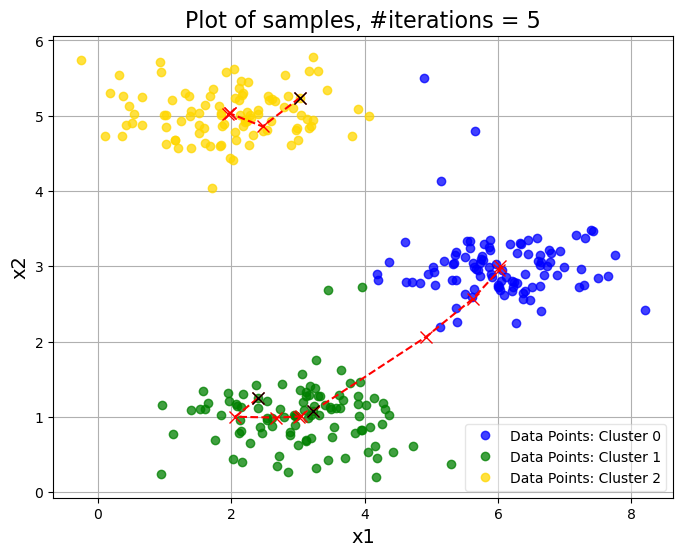

In [315]:
## We will run 5 times with different initialization
num_runs = 5
k = 3
max_n_iter = 10 
for i in range(num_runs):
    random.seed(i) 
    init_centroids = choose_random_centroids(samples, k)
    clusters, centroid_history  = run_k_means(samples, init_centroids, max_n_iter=max_n_iter)
    plot_cluster(samples, centroid_history, clusters)


**Question:** How the random initialization affects the KMeans algorithms (in terms of number of iterations, cluster assigments)?

Write your answer in this block

**Your Answer:** The closer the initial centroids are declared, the more iterations the algorithm would take to yield the optimal clusters. If all the initial centroids are close to each other and in the same data point cloud, it is likely that any data outside of that data point cloud would not be clustered optimally, while the data point around the data point clouds would be clustered excessively, leaving one expected cluster with more excessive clustering within itself.


## **2.4 Short answer:** K-means -  Elbow method  *(10 pts)*

The Elbow method can be useful to choose the number of clusters `k` in KMeans.

First, we plot the **sum of squared distances of samples to their closest cluster center** by `k`.\
Then, we pick `k` where the distance falls suddenly. The idea is to find where  diminishing returns are no longer worth the additional cost. 

In this section, we will use K-means implementation from Sklearn. You can refer to the document [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).


/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Use

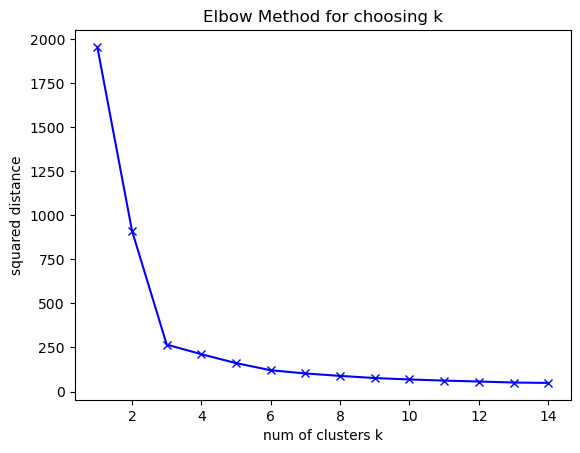

In [316]:
from sklearn.cluster import KMeans

def show_elbow():
    squared_distances = []
    k_list = range(1,15)
    for k in k_list:
        km = KMeans(n_clusters=k)
        km = km.fit(samples)
        squared_distances.append(km.inertia_)

    plt.plot(k_list, squared_distances, "bx-")
    plt.xlabel("num of clusters k") 
    plt.ylabel("squared distance") 
    plt.title("Elbow Method for choosing k")
    plt.show()
    
show_elbow()

**Question:** Which are good values for $k$ on the dataset? Should we pick $k=14$ as it has the least sum squared distance? Briefly explain your choices.

Write your answer in this block

**Your Answer:** Any values above or equal to 3 are good values for ``k`` on the dataset. However, we should not pick ``k=14`` because that is not the optimal value. ``k=14`` might be subject to overfitting to the training data for clusters. 



## **2.5 Short answer:** K-means on sample dataset  *(10 pts)*

There's [a good playground](https://cartography-playground.gitlab.io/playgrounds/clustering-comparison/) where you can play around with K-means algorithms on your own datasets. In this question, you will need to determine if K-means can work well on the 2-d dataset below.

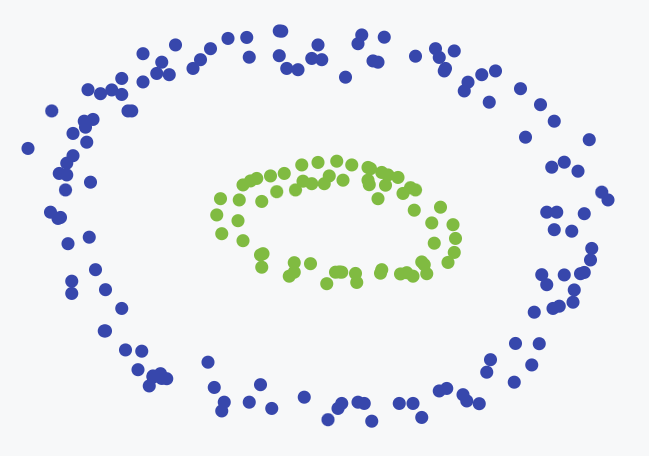

In [317]:
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps2/kmeans_pic.png")

**Question:** Let's say we have 2-cluster dataset (blue outer circle and green inner circle). If we apply K-means directly on the dataset, and assume we know in advance $k=2$ (i.e., 2 clusters), will K-means come up clusering the 2 clusters correctly? Justify your answer. 

Write your answer in this block

**Your Answer:** K-means will not come up clustering the 2 clusters correctly. Given that we only have ``k=2``, which indicates only 2 centroids, the most optimal centroid locations would be near the center of the circle. However, the result would then be all data are in the same cluster or some blue data point got classified into green cluster when the centroid of the blue data leans toward a particular side of the circle.


# **Question 3.** Use case of K-means and PCA (*40 total points*)

I this section, we will work with California Housing dataset. The dataset was adapted from [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).

The dataset was based on the 1990 California census data. It consists of 20428 samples. There are seven continuous columns, and one categorical column. You can find more information about the dataset at [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).


In [318]:
## read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps2/housing_cleaned_v3.csv")
print("data shape:", df.shape) ## number of rows, columns
df.sample(10)  ## show 10 random samples to get a sense of the dataset

data shape: (20428, 8)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17792,26.0,3285.0,502.0,1443.0,530.0,5.7833,339600.0,<1H OCEAN
9943,14.0,770.0,116.0,285.0,116.0,3.6434,155400.0,INLAND
9921,39.0,2099.0,433.0,929.0,423.0,1.9886,113800.0,INLAND
16774,52.0,2351.0,494.0,1126.0,482.0,3.9688,356900.0,NEAR OCEAN
9729,42.0,817.0,194.0,391.0,193.0,2.1776,279200.0,<1H OCEAN
16643,37.0,694.0,188.0,658.0,225.0,4.6103,237500.0,NEAR OCEAN
14539,8.0,2205.0,348.0,777.0,341.0,6.0266,177400.0,<1H OCEAN
16730,52.0,1900.0,290.0,665.0,276.0,4.5486,500001.0,NEAR OCEAN
9981,36.0,1870.0,338.0,947.0,324.0,4.1205,217000.0,<1H OCEAN
3754,44.0,2295.0,560.0,1543.0,528.0,2.3851,194100.0,<1H OCEAN


In [319]:
## We will use the first 7 continuous columns as features, and the categorical column as label
# Let's see how many classes we have, and how many samples in each class
df["ocean_proximity"].value_counts()  ## (class name, number of samples)

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: count, dtype: int64

In [320]:
# We need to do a bit of proccessing here.
# First, we map string label to number
label_map = {
            "<1H OCEAN": 0,
            "INLAND": 1,
            "NEAR OCEAN": 2,
            "NEAR BAY" : 3}

X, y = df.values[:, :-1], df["ocean_proximity"].map(label_map).values
print("features shape:", X.shape)
print("label shape:", y.shape)
print("-"*5)

## Let's see what we have for a pair of (features, label)
print("features: ", X[0])
print("label: ", y[0])

features shape: (20428, 7)
label shape: (20428,)
-----
features:  [41.0 880.0 129.0 322.0 126.0 8.3252 452600.0]
label:  3


In the following questions, assume that we know in advance there're 4 clusters (i.e., 4 different classes) in the dataset. 


## **3.1 Code:** Evaluating K-means *(10 pts)*
In this question, you will make and train (i.e., use `fit()` to compute clustering) a [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) model using sklearn.
the model will get raw feature `X` as the input.


In [321]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [322]:
def question_3_1(X: np.ndarray, k: int, random_state: int) -> sklearn.cluster.KMeans:
  
    """
        Train a K-means model on raw feature X.
        X: numpy array, shape of (20428, 9)
        k: number of clusters for K-means
        random_state: random seed, passed to K-means when initializing. 
        return the trained K-means model (remember to call `fit()` function)
    """
    # Write your code in this block -----------------------------------------------------------


    k_means = sklearn.cluster.KMeans(n_clusters=k, random_state=random_state).fit(X)
    
    return k_means
  
    # End of your code ------------------------------------------------------------------------


## Test your model:
k = 4  ## assume we know there should be 4 cluters
random_state = 2022  ## to reproduce the same results for different runs
kmeans = question_3_1(X, k, random_state)

/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Now, K-means has converged on 4 clusters. How can we evaluate this?**

Recall that K-means is an unsupervised algorithm. 

Hence, it found patterns in the data and assigned it some labels without looking at the annotated labels in the dataset. 

Hence, the numbering of these labels may not in any way correspond to the way the dataset annotators annotated it.

**So, now that we have 4 cluster ids from K-means, we need to map them to the 4 annotated labels in the dataset based on the "best" possible assignment**

Normally, we would do this "best" matching on a training set, and then evaluate on a held out test set. But, for this exercise, let's find the best matching possible on the entire set.

One way to do this would be to calculate the mean features for each of the ground truth labels. Then we can assign the predicted cluster ids to the labels based on the cluster center that is the closest to the mean features for a label. 

## 3.2 Code: Now, let's compute the mean features for each label (5 pts)

In [323]:
from collections import defaultdict
def question_3_2(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
        compute the average feature vector for each class. 
    """
    
    class_means = defaultdict(list) # should have keys as the unique class labels in y and the values are the mean feature vector for that class from the X data.
    # Write your code in this block -----------------------------------------------------------
    
    fea_sum = np.zeros([4, len(X[0])])
    
    fea_count = np.zeros([4])
    
    for i in range(len(y)):
        fea_sum[y[i]] = np.add(fea_sum[y[i]], X[i])
        fea_count[y[i]] += 1
        
    feature_mean = fea_sum / fea_count[:,None]
    
    feature_mean = np.array(feature_mean)
    
    
    
    # End of your code ------------------------------------------------------------------------
    return dict(enumerate(feature_mean,0))

class_means = question_3_2(X, y)
print(class_means)

# {0: array([29.277396502103166, 2627.2334514058, 546.5391852999778,
#        1518.4404471994687, 517.4190834624751, 4.231100520256803,
#        240267.99081248615], dtype=object), 1: array([24.26262315270936, 2721.2529248768474, 533.8816194581281,
#        1392.4114839901479, 478.0069273399015, 3.2103587130541835,
#        124896.86314655172], dtype=object), 2: array([29.31468797564688, 2587.165525114155, 538.6156773211568,
#        1355.6373668188737, 501.52891933028917, 4.006374467275495,
#        249042.35502283106], dtype=object), 3: array([37.75638766519824, 2490.3352422907487, 514.1828193832599,
#        1227.8810572687225, 487.2361233480176, 4.175646916299569,
#        259279.29207048457], dtype=object)}

{0: array([2.92773965e+01, 2.62723345e+03, 5.46539185e+02, 1.51844045e+03,
       5.17419083e+02, 4.23110052e+00, 2.40267991e+05]), 1: array([2.42626232e+01, 2.72125292e+03, 5.33881619e+02, 1.39241148e+03,
       4.78006927e+02, 3.21035871e+00, 1.24896863e+05]), 2: array([2.93146880e+01, 2.58716553e+03, 5.38615677e+02, 1.35563737e+03,
       5.01528919e+02, 4.00637447e+00, 2.49042355e+05]), 3: array([3.77563877e+01, 2.49033524e+03, 5.14182819e+02, 1.22788106e+03,
       4.87236123e+02, 4.17564692e+00, 2.59279292e+05])}


### Now, we will have to map the predicted cluster numbers to the labels based on which cluster center is nearest to the mean features for our label classes. 

In [324]:
# we will use a technique called "Hungarian algorithm" to find the best matching between clusters and labels
# this is implemented using linear_sum_assignment function from scipy
# you are not reuqired to learn this, but you can read more about it here: https://en.wikipedia.org/wiki/Hungarian_algorithm
from scipy.optimize import linear_sum_assignment

def create_map(kmeans, class_means):
    cluster_to_label_map = {} # this would have a mapping from cluster index to class label

    # first we create a cost matrix that calculates a cost for each cluster center index and label pair
    cost_matrix = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            cost_matrix[i, j] = np.linalg.norm(kmeans.cluster_centers_[i] - class_means[j])

    # then we use linear_sum_assignment to find the best matching between clusters and labels
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    
    for i in range(k):
        cluster_to_label_map[i] = col_ind[i]
    
    print("Best mapping of kmeans cluster id to class label:")
    print(cluster_to_label_map)

    return cluster_to_label_map

cluster_to_label_map = create_map(kmeans, class_means) # you must use this to map your K-Means prediction while evaluating accuracy with the y labels

Best mapping of kmeans cluster id to class label:
{0: 3, 1: 2, 2: 1, 3: 0}


### From now on, make sure to call `cluster_to_label_map(pred)` on your predicted cluster ids when evaluating accuracy with the `y` labels


## **3.2 Code:** K-means - Accuracy score  *(10 pts)*


The cluster's labels of Sklearn's K-means model can be accessed by attribute `labels_`.
We can measure the performance of k-means by computing accuracy score of cluster's label with the ground-truth labels `y`

In [325]:
def question_3_3(kmeans: sklearn.cluster.KMeans, y: np.ndarray, cluster_to_label_map: dict):
    """
        Compute accuracy score of k-means algorithms
        kmeans: the trained k-means model from the previous question
        y: ground-truth labels, numpy array shape of (20428, )
        return the accuracy score of k-means: a float number in range [0, 1]
    """
  # Write your code in this block -----------------------------------------------------------
    labels = np.array(kmeans.labels_)
    total = len(labels)
    
    labels = np.vectorize(cluster_to_label_map.get)(labels)
    
    correctness = labels == y
    
    accurate = np.count_nonzero(correctness)
    
    
    return accurate / total

  # End of your code ------------------------------------------------------------------------


## Test your function
question_3_3(kmeans, y, cluster_to_label_map)

# [0 1 2 3] [3 2 1 0]
# {0: 3, 1: 2, 2: 1, 3: 0}
# 0.5030350499314666

0.5030350499314666


## **3.3 Short Answer:** What is the chance (random) accuracy here and are we doing better than it? Is K-means best suited for this task, or would you use some other algorithm? (5 pts)


Your Answer here: The chance accuracy is 0.25 and the algorithm does better than the chance accuracy. Therefore, K-means work well for this tasks but there might be other method that can yield higher accuracy. Rather, I would use SVM with the implementation of subproblem binary classification to yield a complete divisive clustering algorithm. 

## **3.4 Short answer :** K-means with PCA  *(10 pts)*
Working with high dimensional data is challenging. First, it's hard to visualize all the dimensions. It also takes much more time to run the algorithms on the large amount of data.

One idea is to combine PCA with K-means. To begin with, we apply PCA on the data to reduce the number of features, then fit a K-means model on the reduced features.\
We will try apply PCA with 1, 2, ..., up to all components, to see how it affects the k-means results on the dataset.


In [326]:
from time import time
num_features = X.shape[1]
for n_components in range(1, num_features + 1 ):
    start_time = time()  ## measure runtime of PCA+kmeans 

  ## PCA
    sklearn_pca = sklearn.decomposition.PCA(n_components=n_components)
    X_reduced = sklearn_pca.fit(X).transform(X)

  ## K-means
    kmeans =  KMeans(n_clusters=k, random_state=random_state).fit(X_reduced)
  
    runtime = time() - start_time

  # evaluate accuracy
    class_means = question_3_2(X_reduced, y)
    cluster_to_label_map = create_map(kmeans, class_means)
  

    print(f"n_components = {n_components}, accuracy = {question_3_3(kmeans, y, cluster_to_label_map)}, runtime = {runtime}")

/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Best mapping of kmeans cluster id to class label:
{0: 1, 1: 3, 2: 2, 3: 0}
n_components = 1, accuracy = 0.5008321911102408, runtime = 0.12007308006286621
Best mapping of kmeans cluster id to class label:
{0: 1, 1: 2, 2: 3, 3: 0}
n_components = 2, accuracy = 0.5047483845701978, runtime = 0.11750984191894531


/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Best mapping of kmeans cluster id to class label:
{0: 1, 1: 2, 2: 3, 3: 0}
n_components = 3, accuracy = 0.5047973369884472, runtime = 0.12256836891174316
Best mapping of kmeans cluster id to class label:
{0: 1, 1: 2, 2: 3, 3: 0}
n_components = 4, accuracy = 0.5047973369884472, runtime = 0.12366628646850586


/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Best mapping of kmeans cluster id to class label:
{0: 1, 1: 2, 2: 3, 3: 0}
n_components = 5, accuracy = 0.5047973369884472, runtime = 0.1234748363494873
Best mapping of kmeans cluster id to class label:
{0: 3, 1: 2, 2: 1, 3: 0}
n_components = 6, accuracy = 0.5030350499314666, runtime = 0.11736106872558594
Best mapping of kmeans cluster id to class label:
{0: 3, 1: 2, 2: 1, 3: 0}
n_components = 7, accuracy = 0.5030350499314666, runtime = 0.1250629425048828


/Users/wylliamcheng/anaconda3/envs/CS541/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Question:** Compare the result (accuracy, runtime) in question 3.3 with the *K-means & PCA* results.\
Compare the results of `n_components = 7` with the results in question 3.3. Explain why they are the same/different.

Write your answer in this block

**Your Answer:** All k_means with PCA would yield higher accuracy than the chance accuracy. The results of ``n_components = 7`` and question 3.3 are the same. ``n_components = 7`` indicates that all 7 features are used to train the clustering model, which was the equivalent of leaving the data unchanged. 




Congrats! You have reached to the end of ps2.